This is a demonstration of an autoencoder trained to improve image resolution.  It takes a low-resolution (64x64 px) image and outputs a 256x256 px version.  

***It is recommended that this notebook be run on Google Colab or a computer with a dedicated GPU.  Running on only CPU may lead to absurdly long runtimes.

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, losses
from keras.layers import Dense, Input, Conv2D, UpSampling2D, MaxPool2D
from keras.models import Sequential

Importing, scaling, and shaping train and test images.  Create lower resolution versions of train and test datasets.

In [ ]:
# Function to load and resize images
def load_and_resize_images(folder, size, resize_factor):
  images = []
  small_images = []
  for filename in os.listdir(folder):
    img=Image.open(os.path.join(folder, filename))
    img = img.resize((size, size))
    images.append(np.array(img))

    new_size = int(size * resize_factor)
    small_image = img.resize((new_size, new_size))
    small_images.append(np.array(small_image))
  return np.array(images), np.array(small_images)

In [ ]:
# Load and resize the train and test datasets
# Note: Change file path based on your file location.
train_folder = '/content/drive/MyDrive/ITP359/ITP359_FP/ITP359_FP_Data/P1/train'
test_folder = '/content/drive/MyDrive/ITP359/ITP359_FP/ITP359_FP_Data/P1/test'
image_size = 256
resize_factor = 0.25

train_images, train_images_small = load_and_resize_images(train_folder, image_size, resize_factor)
test_images, test_images_small = load_and_resize_images(test_folder, image_size, resize_factor)

# Assign the train and test datasets
x_train = train_images.astype('float32')/255.0
x_test = test_images.astype('float32')/255.0
print(x_train.shape)

# Assign the train and test datasets for small images
x_train_small = train_images_small.astype('float32')/255.0
x_test_small = test_images_small.astype('float32')/255.0
print(x_train_small.shape)


(1300, 256, 256, 3)
(1300, 64, 64, 3)


Visualizing 25 images (256x256) from train dataset 

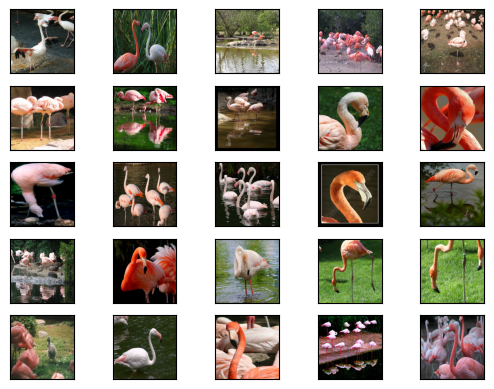

In [ ]:
for img in range(25):
  plt.subplot(5,5,img+1)
  plt.imshow(x_train[img])
  plt.xticks([])
  plt.yticks([])

Visualizing 25 low resolution images (64x64) from the train dataset.

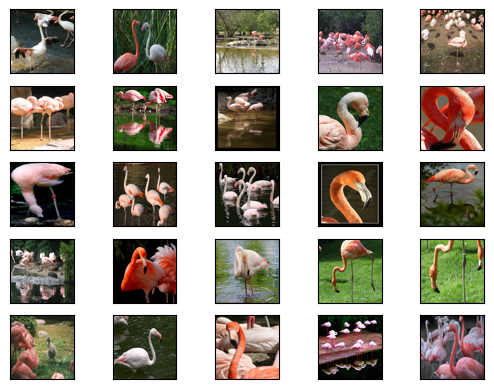

In [ ]:
for img in range(25):
  plt.subplot(5,5,img+1)
  plt.imshow(x_train_small[img])
  plt.xticks([])
  plt.yticks([])

Visualizing one image and its low-resolution version side-by-side.

Text(0.5, 0.98, 'Full Size vs Small Size')

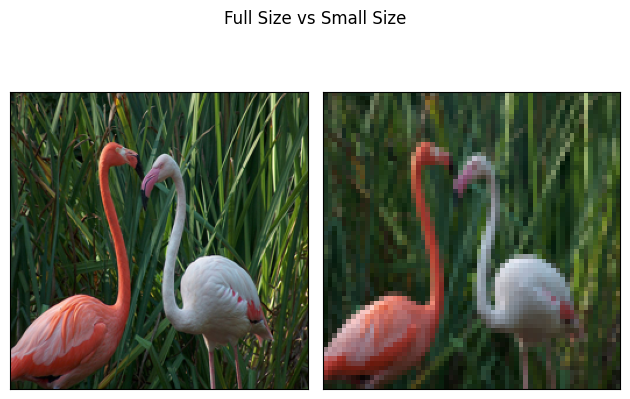

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x_train[1])
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_train_small[1])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.suptitle("Full Size vs Small Size")

Autoencoder build with Keras layers.  First convolution layer takes in a 64x64 px RGB image.  Output layer has three channels (RGB) and uses sigmoid activation function to map neuron outputs to three probabilities between 0 and 1.

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same", input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size = (2,2), padding = "same"))
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size = (2,2), padding = "same"))

# Decoder
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3, (3,3), activation = "sigmoid", padding = "same"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_9 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 256, 256, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,163 (735.01 KB)

 Trainable params: 188,163 (735.01 KB)

 Non-trainable params: 0 (0.00 B)

Train the model for 50 epochs.  MSE loss function is used to penalize error more heavily.

In [ ]:
model.compile(optimizer = "adam", loss="mse")
model.fit(x_train_small, x_train, validation_split=0.2, epochs = 50, batch_size = 64, verbose = 1)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step - loss: 0.0741 - val_loss: 0.0394
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 0.0357 - val_loss: 0.0239
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 0.0224 - val_loss: 0.0178
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0170 - val_loss: 0.0159
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0164 - val_loss: 0.0149
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - loss: 0.0121 - val_loss: 0.0127
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/ste

Enhancing the resolution of one low-resolution image from the test dataset.  Then, visualizing the original, small, and enhanced images

(64, 64, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


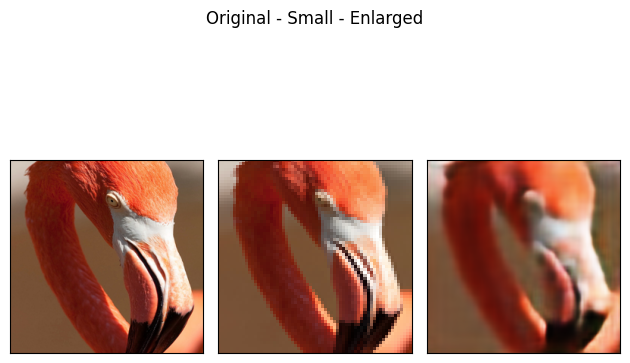

In [ ]:
print(x_test_small[1].shape)
pred = model.predict(x_test_small)
fig = plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_test[1])
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(x_test_small[1])
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(pred[1])
plt.xticks([])
plt.yticks([])
fig.suptitle("Original - Small - Enlarged")
plt.tight_layout()